In [361]:
from subprocess import check_output
from scipy.cluster.hierarchy import linkage, dendrogram
from scipy.spatial.distance import pdist
from scipy.cluster import hierarchy
print(check_output(["ls", "data"]).decode("utf8"))

import pandas as pd
import numpy as np
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(style='white')
%matplotlib inline
from sklearn import decomposition
from sklearn import datasets
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering, AffinityPropagation, SpectralClustering
from sklearn import metrics

data = pd.read_csv("data/hmeq.csv")
data.groupby('BAD').size()

bank.csv
hmeq.csv



BAD
0    4771
1    1189
dtype: int64

In [362]:
data.head(5)

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1100,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,1.0,9.0,NaN
1,1,1300,70053.0,68400.0,HomeImp,Other,7.0,0.0,2.0,121.833333,0.0,14.0,NaN
2,1,1500,13500.0,16700.0,HomeImp,Other,4.0,0.0,0.0,149.466667,1.0,10.0,NaN
3,1,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,1700,97800.0,112000.0,HomeImp,Office,3.0,0.0,0.0,93.333333,0.0,14.0,NaN


In [363]:
data.dropna(inplace=True)

In [364]:
#Пустые значения
data.isnull().sum()

BAD        0
LOAN       0
MORTDUE    0
VALUE      0
REASON     0
JOB        0
YOJ        0
DEROG      0
DELINQ     0
CLAGE      0
NINQ       0
CLNO       0
DEBTINC    0
dtype: int64

In [365]:
data['JOB'].unique()

array(['Other', 'Office', 'Mgr', 'ProfExe', 'Sales', 'Self'], dtype=object)

In [366]:
#Размерность таблицы
data.shape

(3364, 13)

In [367]:
data.size

43732

In [368]:
#Замена строковых типов числовым
from sklearn.preprocessing import LabelEncoder

labelencoder = LabelEncoder()
for col in data.columns:
    data[col] = labelencoder.fit_transform(data[col])

data.head()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
5,1,0,343,90,1,2,9,0,0,552,1,8,2104
7,1,1,313,117,1,2,11,0,0,370,0,8,2057
19,0,2,2688,2457,1,1,2,0,0,407,0,13,1117
25,1,3,420,171,1,0,12,0,0,155,1,21,2341
26,0,3,2621,2366,1,1,4,0,0,450,0,13,893


In [369]:
#Проверка замены типов
data['JOB'].unique()

array([2, 1, 0, 3, 4, 5])

In [370]:
#X = data.drop('BAD', axis=1)
#y = data['BAD']
#X.head()

In [371]:
np.unique(y)

array([0, 1])

In [372]:
categorical_features = ['BAD']
continious_features = ['LOAN', 'MORTDUE', 'VALUE', 'REASON', 'JOB', 'YOJ', 'DEROG', 'DELINQ', 'CLAGE', 'NINQ', 'CLNO', 'CLNO', 'DEBTINC']
data[continious_features].describe()

,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,CLNO,DEBTINC
count,3364.000000,3364.000000,3364.000000,3364.000000,3364.000000,3364.000000,3364.000000,3364.000000,3364.00000,3364.000000,3364.000000,3364.000000,3364.00000
mean,157.778537,1659.676576,1664.389417,0.295779,1.947979,9.105826,0.146849,0.278537,1681.50000,1.037158,22.094530,22.094530,1681.50000
std,90.776529,957.342720,959.990207,0.456460,1.139914,7.580715,0.579524,0.806237,971.24748,1.547576,9.314474,9.314474,971.24748
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000
25%,91.000000,831.750000,834.750000,0.000000,1.000000,3.000000,0.000000,0.000000,840.75000,0.000000,16.000000,16.000000,840.75000
50%,141.000000,1656.500000,1666.500000,0.000000,2.000000,7.000000,0.000000,0.000000,1681.50000,1.000000,21.000000,21.000000,1681.50000
75%,209.250000,2489.250000,2491.250000,1.000000,3.000000,13.000000,0.000000,0.000000,2522.25000,2.000000,27.000000,27.000000,2522.25000
max,467.000000,3321.000000,3331.000000,1.000000,5.000000,36.000000,10.000000,9.000000,3363.00000,12.000000,56.000000,56.000000,3363.00000


In [373]:
dummies = pd.get_dummies(data['BAD'], prefix=col)
data = pd.concat([data, dummies], axis = 1)
data.drop('BAD', axis = 1, inplace = True)

In [374]:
data.head()

,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,DEBTINC_0,DEBTINC_1
5,0,343,90,1,2,9,0,0,552,1,8,2104,0,1
7,1,313,117,1,2,11,0,0,370,0,8,2057,0,1
19,2,2688,2457,1,1,2,0,0,407,0,13,1117,1,0
25,3,420,171,1,0,12,0,0,155,1,21,2341,0,1
26,3,2621,2366,1,1,4,0,0,450,0,13,893,1,0


In [375]:
data.shape

(3364, 14)

In [376]:
mms = MinMaxScaler()
mms.fit(data)
data_transformed = mms.transform(data)

/usr/local/lib/python3.7/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [377]:
Sum = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    Sum.append(km.fit(data_transformed).inertia_)

Sum

[3005.223217514277,
 2293.8045742600457,
 1998.3797656621316,
 1525.7408596492483,
 1417.4557104460737,
 1321.4444997779167,
 1262.5259612557006,
 1194.4865939394463,
 1144.4584316535095,
 1109.081383381192,
 1062.8305116482384,
 1035.0407439288801,
 995.3234039755907,
 969.1026450474013]

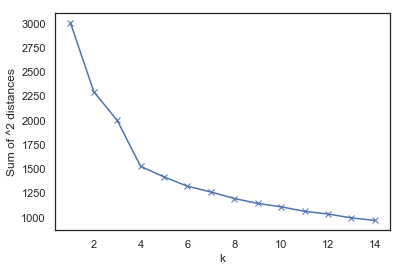

In [378]:
plt.plot(K, Sum, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum of ^2 distances')
plt.show()

In [379]:
# clustering
n_clusters = 2
km = KMeans(n_clusters=n_clusters).fit(data)

centroids = km.cluster_centers_
print(centroids)
  
# fit & predict clusters
#data['cluster'] = km.fit_predict(Z)
#data

[[1.77889729e+02 2.50235035e+03 2.46664524e+03 2.96156270e-01
  2.02709515e+00 8.98109641e+00 1.06490233e-01 2.27473220e-01
  1.85990296e+03 1.11846251e+00 2.46023945e+01 1.95135224e+03
  9.16824197e-01 8.31758034e-02]
 [1.39817670e+02 9.07102983e+02 9.47912212e+02 2.95441756e-01
  1.87732133e+00 9.21722003e+00 1.82892515e-01 3.24141812e-01
  1.52217220e+03 9.64546989e-01 1.98548115e+01 1.44050084e+03
  9.05458638e-01 9.45413618e-02]]


In [380]:
#km.labels_

In [381]:
#plt.scatter(data_transformed[:, 8], data_transformed[:, 1], c=km.labels_.astype(float), s=50, alpha=0.5)

In [382]:
scaler = StandardScaler()
X = scaler.fit_transform(data.drop('DEBTINC_0', 1))
X = scaler.fit_transform(data.drop('DEBTINC_1', 1))

data['cluster'] = km.fit_predict(X)

/usr/local/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/usr/local/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [383]:
data.head(20)

,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,DEBTINC_0,DEBTINC_1,cluster
5,0,343,90,1,2,9,0,0,552,1,8,2104,0,1,0
7,1,313,117,1,2,11,0,0,370,0,8,2057,0,1,0
19,2,2688,2457,1,1,2,0,0,407,0,13,1117,1,0,0
25,3,420,171,1,0,12,0,0,155,1,21,2341,0,1,0
26,3,2621,2366,1,1,4,0,0,450,0,13,893,1,0,0
34,4,2714,2213,1,1,1,0,0,477,0,13,926,1,0,0
35,4,2720,2453,1,1,2,0,0,557,0,13,915,1,0,0
36,4,10,680,1,2,16,3,0,905,2,8,1898,0,1,0
37,4,1436,824,0,0,2,0,0,3012,3,37,3328,0,1,0
38,5,2725,2476,1,1,2,0,0,339,0,14,1170,1,0,0


In [384]:
val_1 = data[(data.DEBTINC_1 == 0) & (data.cluster == 0)]
val_1.size

24165

In [385]:
val_2 = data[(data.DEBTINC_0 == 1) & (data.cluster == 1)]
val_2.size

21795

In [386]:
data.size - val_1.size - val_2.size

4500

In [392]:
algorithms = []
algorithms.append(km)
algorithms.append(AffinityPropagation())
algorithms.append(SpectralClustering(n_clusters=4, random_state=1,
                                     affinity='nearest_neighbors'))
algorithms.append(AgglomerativeClustering(n_clusters=4))

y = data['cluster']
dt = []
for algo in algorithms:
    algo.fit(X)
    dt.append(({
        'ARI': metrics.adjusted_rand_score(y, algo.labels_),
        'AMI': metrics.adjusted_mutual_info_score(y, algo.labels_),
        'Homogenity': metrics.homogeneity_score(y, algo.labels_),
        'Completeness': metrics.completeness_score(y, algo.labels_),
        'V-measure': metrics.v_measure_score(y, algo.labels_),
        'Silhouette': metrics.silhouette_score(X, algo.labels_)}))

results = pd.DataFrame(data=dt, columns=['ARI', 'AMI', 'Homogenity',
                                           'Completeness', 'V-measure', 
                                           'Silhouette'],
                       index=['K-means', 'Affinity', 
                              'Spectral', 'Agglomerative'])

results

/usr/local/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/manifold/spectral_embedding_.py:237: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
/usr/local/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default

,ARI,AMI,Homogenity,Completeness,V-measure,Silhouette
K-means,0.677928,0.568206,0.568938,0.568299,0.568618,0.306334
Affinity,0.020639,0.120971,0.790558,0.123651,0.213853,0.290101
Spectral,0.528817,0.437339,0.472660,0.437681,0.454498,0.123107
Agglomerative,0.278801,0.246395,0.480043,0.246645,0.325863,0.208889


In [134]:
df_filtered = data[(data.BAD == data.cluster)]
print(df_filtered.size)

AttributeError: 'DataFrame' object has no attribute 'BAD'

In [277]:
df_filtered = data[(data.BAD != data.cluster)]
print(df_filtered.size)

23128


In [246]:
# Импортируем библиотеки
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,  test_size=0.33, random_state=42)

scaler = StandardScaler()
X = scaler.fit_transform(X_train)
 
# Описываем модель
model = KMeans(n_clusters=2)

# Проводим моделирование
model.fit(X_train)
 
# Предсказание на единичном примере
predicted_label = model.predict(X_test)
 
X = data.drop('BAD', 1)

# Предсказание на всем наборе данных
all_predictions = model.predict(X)
 
# Выводим предсказания
print(predicted_label)
print(all_predictions)

[1 0 1 ... 0 0 0]
[0 0 1 ... 0 0 0]


/usr/local/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [247]:
plt.scatter(X[:, 0], X[:, 1], c=labels,
            s=50, cmap='viridis');

TypeError: '(slice(None, None, None), 0)' is an invalid key

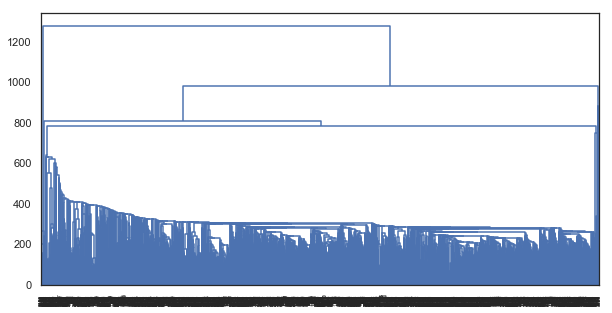

In [231]:
distance_mat = pdist(data)
Z = hierarchy.linkage(distance_mat, 'single') # linkage — реализация агломеративного алгоритма
plt.figure(figsize=(10, 5))
dn = hierarchy.dendrogram(Z, color_threshold=0.5)

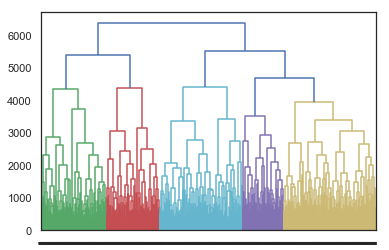

In [206]:
# Исключаем информацию об образцах зерна, сохраняем для дальнейшего использования
varieties = list(data.pop('BAD'))
 
# Извлекаем измерения как массив NumPy
samples = data.values
 
# Реализация иерархической кластеризации при помощи функции linkage
mergings = linkage(samples, method='complete')
 
# Строим дендрограмму, указав параметры удобные для отображения
dendrogram(mergings,
           labels=varieties,
           leaf_rotation=90,
           leaf_font_size=6,
           )
 
plt.show()

In [194]:
# Предсказание на единичном примере
predicted_label = model.predict(X_test)
print(predicted_label.tolist())

[1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 

TypeError: '(5       False
7       False
19      False
25       True
26      False
34      False
35      False
36      False
37       True
38      False
56      False
59      False
67      False
69      False
70      False
72      False
75      False
78      False
80      False
81      False
83      False
101     False
102     False
106     False
107     False
108     False
109     False
110     False
111     False
113     False
        ...  
5911    False
5912    False
5913    False
5914    False
5915    False
5916    False
5917    False
5918    False
5920    False
5921    False
5922    False
5923    False
5924    False
5925    False
5926    False
5927    False
5928    False
5929    False
5934    False
5949    False
5950    False
5951    False
5952    False
5953    False
5954    False
5955    False
5956    False
5957    False
5958    False
5959    False
Name: JOB, Length: 3364, dtype: bool, 0)' is an invalid key

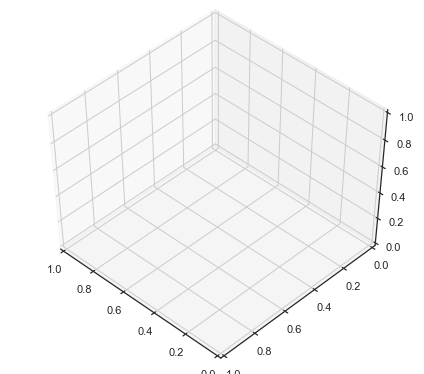

In [149]:
# Заведём красивую трёхмерную картинку
fig = plt.figure(1, figsize=(6, 5))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

plt.cla()

for name, label in [('Mgr', 0), ('Office', 1), ('Other', 2), ('ProfExe', 3), ('Sales', 4), ('Self', 5)]:
    ax.text3D(X[y == label, 0].mean(),
              X[y == label, 1].mean() + 1.5,
              X[y == label, 2].mean(), name,
              horizontalalignment='center',
              bbox=dict(alpha=.5, edgecolor='w', facecolor='w'))
# Поменяем порядок цветов меток, чтобы они соответствовали правильному
#y_clr = np.choose(y, [1, 2, 0]).astype(np.float)
#ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y_clr, cmap=plt.cm.nipy_spectral)

#ax.w_xaxis.set_ticklabels([])
#ax.w_yaxis.set_ticklabels([])
#ax.w_zaxis.set_ticklabels([]);

In [58]:
print(scaler.mean_)

[4.9995000e+03 4.9995000e+03 1.5077742e+03 2.5958460e+02 7.4630000e-01
 5.4570000e-01 2.0920600e+01 5.0128000e+00 2.0367881e+03 5.3020000e-01
 7.0550000e-01 5.1510000e-01 4.9986212e+03 2.0370000e-01]


In [59]:
print(scaler.transform(data))
X_scaled = scaler.transform(data)

[[-1.73187761 -0.7840994  -0.46418322 ...  0.97024255  0.02403506
   1.97716468]
 [-1.7315312  -0.6032733  -0.3909112  ...  0.97024255  0.2218479
  -0.50577476]
 [-1.73118479 -1.00303063  0.62898807 ... -1.03067011  0.2454053
   1.97716468]
 ...
 [ 1.73118479 -1.48350152  0.07353887 ...  0.97024255 -1.01734044
   1.97716468]
 [ 1.7315312  -0.11899189  0.98943914 ... -1.03067011 -0.1245844
   1.97716468]
 [ 1.73187761 -0.86689143  1.4692527  ... -1.03067011 -1.08108398
  -0.50577476]]


/usr/local/Cellar/ipython/7.4.0/libexec/vendor/lib/python3.7/site-packages/ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  """Entry point for launching an IPython kernel.
/usr/local/Cellar/ipython/7.4.0/libexec/vendor/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  


In [66]:
pca = PCA(n_components=2)
X_pca = pca.fit(X_scaled)
print(pca.explained_variance_ratio_)

[0.09971307 0.0847248 ]


In [67]:
print(pca.singular_values_)

[118.1517242  108.91038826]
